In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

As this is a majority repeat of the last eda I am going to leave most of the comments, please feel free to ask any questions around this.

In [4]:
book_df = pd.read_csv('../Data/Upgraded_data/Books.csv',  sep=';', quotechar='"', header=0, encoding='latin1', error_bad_lines=False, warn_bad_lines=True)
book_ratings_df = pd.read_csv('../Data/Upgraded_data/Book-Ratings.csv', sep=';', quotechar='"', header=0, encoding='latin1', error_bad_lines=False, warn_bad_lines=True)
users_df = pd.read_csv('../Data/Upgraded_data/Users.csv', sep=';', quotechar='"', header=0, encoding='latin1', error_bad_lines=False, warn_bad_lines=True)

C:\Users\alexj\AppData\Local\Temp\ipykernel_2820\2046703773.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book_df = pd.read_csv('../Data/Upgraded_data/Books.csv',  sep=';', quotechar='"', header=0, encoding='latin1', error_bad_lines=False, warn_bad_lines=True)
C:\Users\alexj\AppData\Local\Temp\ipykernel_2820\2046703773.py:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book_df = pd.read_csv('../Data/Upgraded_data/Books.csv',  sep=';', quotechar='"', header=0, encoding='latin1', error_bad_lines=False, warn_bad_lines=True)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fi

In [5]:
book_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [6]:
book_ratings_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [7]:
users_df.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [8]:
book_df = book_df.join(book_ratings_df.groupby('ISBN').count()['Book-Rating'], on='ISBN')
book_df = book_df.rename(columns={"Book-Rating": "Book-Rating-Count"})
book_df = book_df.join(book_ratings_df.groupby('ISBN').mean()['Book-Rating'], on='ISBN')
book_df = book_df[book_df['Year-Of-Publication'] != 'DK Publishing Inc']
book_df = book_df[book_df['Year-Of-Publication'] != 'Gallimard']
book_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating-Count,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,1.0,0.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14.0,4.928571
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3.0,5.000000
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,11.0,4.272727
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,1.0,7.000000
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1.0,4.000000
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,1.0,0.000000
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1.0,0.000000


In [117]:
book_df.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating-Count,Book-Rating
count,271360,271360,271359,271360.0,271358,271360,271360,271357,270151.000000,270151.000000
unique,271360,242135,102023,202.0,16807,271044,271044,271041,NaN,NaN
top,0195153448,Selected Poems,Agatha Christie,2002.0,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...,NaN,NaN
freq,1,27,632,13903.0,7535,2,2,2,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.816888,2.884353
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.811690,3.284522
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.818182
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,5.000000


In [172]:

book_df.isna().sum().to_dict()

{'ISBN': 0,
 'Book-Title': 0,
 'Book-Author': 1,
 'Year-Of-Publication': 0,
 'Publisher': 2,
 'Image-URL-S': 0,
 'Image-URL-M': 0,
 'Image-URL-L': 0,
 'Book-Rating-Count': 1188,
 'Book-Rating': 1188}

Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
Dracula                                                                                                                           20
The Secret Garden                                                                                                                 20
                                                                                                                                  ..
On a Clear Day You Can See General Motors: John Z. De Lorean's Look Inside the Automotive Giant                                    1
What Every Kid Should Know                                           

In [173]:
book_df.dropna()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating-Count,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,1.0,0.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14.0,4.928571
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3.0,5.000000
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,11.0,4.272727
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,1.0,7.000000
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1.0,4.000000
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,1.0,0.000000
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1.0,0.000000


In [118]:
top_20_books =  book_df['Book-Title'].value_counts()[:20].iloc[::-1]
top_20_books

Journey                           13
Psychology                        13
Illusions                         13
Nemesis                           14
Beloved                           15
Emma                              15
The Gift                          15
Frankenstein                      16
Black Beauty                      16
Masquerade                        16
Great Expectations                17
Pride and Prejudice               18
The Night Before Christmas        18
Jane Eyre                         19
Adventures of Huckleberry Finn    20
Dracula                           20
The Secret Garden                 20
Wuthering Heights                 21
Little Women                      24
Selected Poems                    27
Name: Book-Title, dtype: int64

Text(0, 0.5, 'Title')

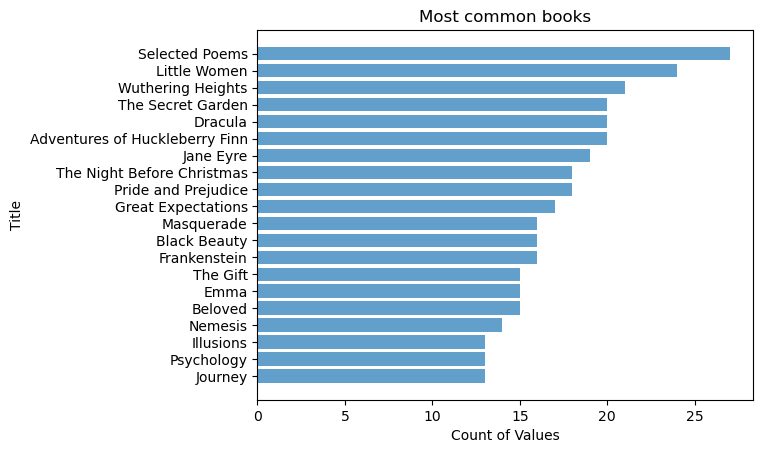

In [119]:
plt.barh(top_20_books.index, top_20_books, alpha=0.7)
plt.title('Most common books')
plt.xlabel('Count of Values')
plt.ylabel('Title')

In [121]:
top_20_authors =  book_df['Book-Author'].value_counts()[:20].iloc[::-1]
top_20_authors

Franklin W. Dixon        204
Janet Dailey             214
Marion Zimmer Bradley    216
Piers Anthony            217
Mary Higgins Clark       218
Terry Pratchett          220
Jane Austen              223
Mark Twain               231
R. L. Stine              282
Not Applicable (Na )     286
Charles Dickens          302
Barbara Cartland         307
Nora Roberts             315
Isaac Asimov             330
Francine Pascal          372
Carolyn Keene            373
Ann M. Martin            423
Stephen King             524
William Shakespeare      567
Agatha Christie          632
Name: Book-Author, dtype: int64

Text(0, 0.5, 'Title')

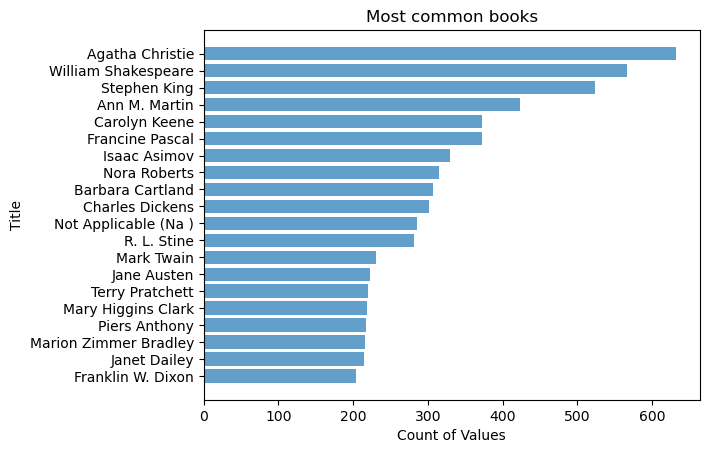

In [122]:
plt.barh(top_20_authors.index, top_20_authors, alpha=0.7)
plt.title('Most common books')
plt.xlabel('Count of Values')
plt.ylabel('Title')

In [130]:
sorted_rating_df = book_df.sort_values(by='Book-Rating-Count', ascending=False)
most_rated = sorted_rating_df[['Book-Title','Book-Rating-Count']].head(30)
most_rated

,Book-Title,Book-Rating-Count
26,Wild Animus,2502.0
408,The Lovely Bones: A Novel,1295.0
748,The Da Vinci Code,883.0
1105,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732.0
522,The Red Tent (Bestselling Backlist),723.0
305,A Painted House,647.0
356,The Secret Life of Bees,615.0
1922,Snow Falling on Cedars,614.0
118,Angels &amp; Demons,586.0
706,Where the Heart Is (Oprah's Book Club (Paperba...,585.0


Text(0, 0.5, 'Title')

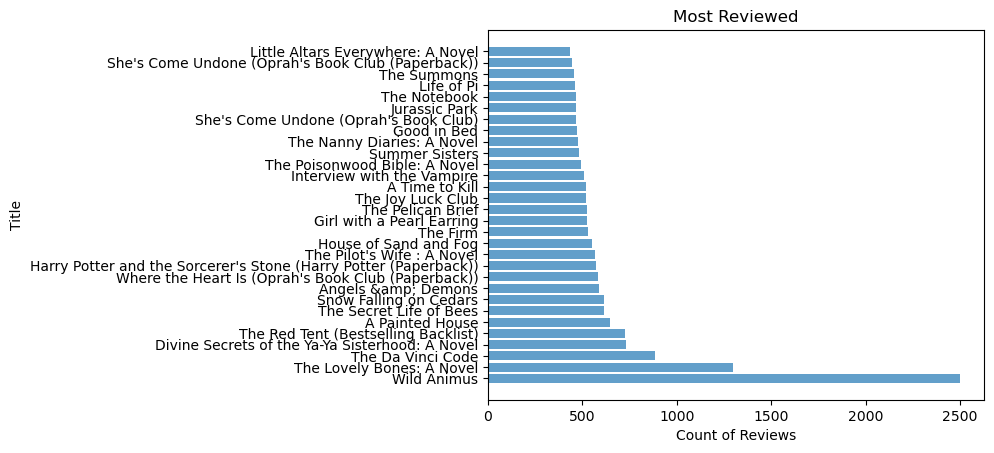

In [131]:

plt.barh(most_rated['Book-Title'], most_rated['Book-Rating-Count'], alpha=0.7)
plt.title('Most Reviewed')
plt.xlabel('Count of Reviews')
plt.ylabel('Title')

In [146]:
time_df = book_df.groupby('Year-Of-Publication').mean()
sample_counts = book_df.groupby('Year-Of-Publication').size()
time_df

,Book-Rating-Count,Book-Rating
Year-Of-Publication,,
0,3.571749,3.138819
1806,1.000000,5.000000
1900,1.000000,0.000000
1901,1.000000,4.571429
1902,5.000000,3.222222
...,...,...
2012,1.000000,0.000000
2020,2.000000,0.000000
2024,1.000000,0.000000


In [150]:
sample_counts.index

Index([     0,   1806,   1900,   1901,   1902,   1904,   1906,   1908,   1910,
         1911,
       ...
       '2004', '2005', '2006', '2008', '2011', '2012', '2020', '2024', '2030',
       '2037'],
      dtype='object', name='Year-Of-Publication', length=200)

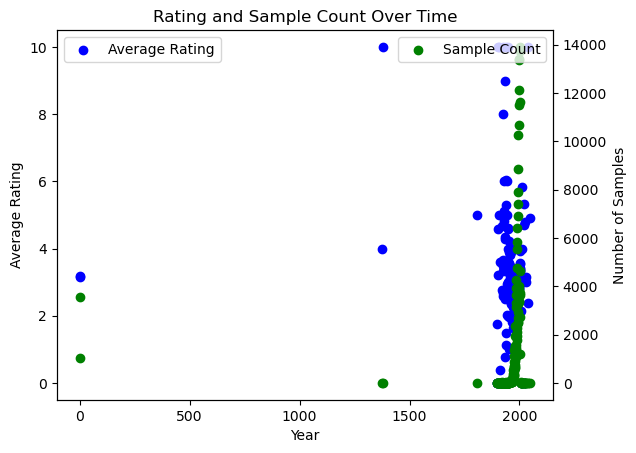

In [152]:

plt.scatter(time_df.index, time_df['Book-Rating'], color='blue', label='Average Rating')
plt.title('Rating and Sample Count Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(loc='upper left')
ax2 = plt.twinx()
ax2.scatter(sample_counts.index ,sample_counts, color='green', label='Sample Count')
ax2.set_ylabel('Number of Samples')

ax2.legend(loc='upper right')
plt.show()

In [157]:
book_df['Year-Of-Publication'] = book_df['Year-Of-Publication'].astype(int)

In [161]:
book_df = book_df[book_df['Year-Of-Publication']>=1900]
book_df = book_df[book_df['Year-Of-Publication']<=2022]
book_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating-Count,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,1.0,0.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14.0,4.928571
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3.0,5.000000
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,11.0,4.272727
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,1.0,7.000000
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1.0,4.000000
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,1.0,0.000000
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1.0,0.000000


In [162]:
time_df = book_df.groupby('Year-Of-Publication').mean()
sample_counts = book_df.groupby('Year-Of-Publication').size()
time_df

,Book-Rating-Count,Book-Rating
Year-Of-Publication,,
1900,1.333333,1.166667
1901,1.000000,4.571429
1902,5.000000,3.222222
1904,1.000000,10.000000
1906,1.000000,5.000000
...,...,...
2010,2.000000,5.833333
2011,4.000000,2.000000
2012,1.000000,0.000000


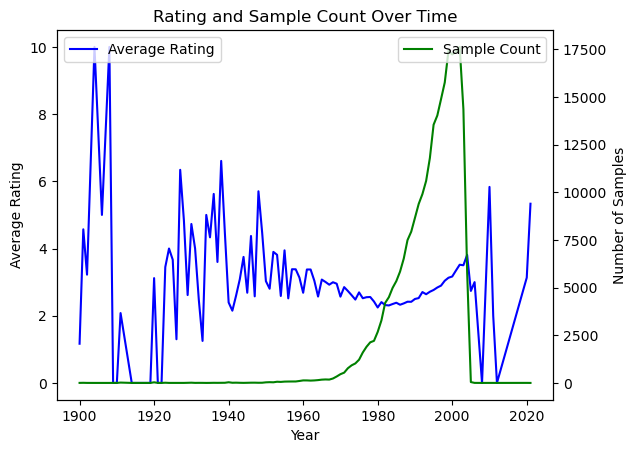

In [164]:
plt.plot(time_df['Book-Rating'], color='blue', label='Average Rating')
plt.title('Rating and Sample Count Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(loc='upper left')
ax2 = plt.twinx()
ax2.plot(sample_counts, color='green', label='Sample Count')
ax2.set_ylabel('Number of Samples')

ax2.legend(loc='upper right')
plt.show()

In [166]:
top_5_authors =  book_df['Book-Author'].value_counts()[:5]
top_5_authors

Agatha Christie        598
William Shakespeare    559
Stephen King           511
Ann M. Martin          423
Francine Pascal        372
Name: Book-Author, dtype: int64

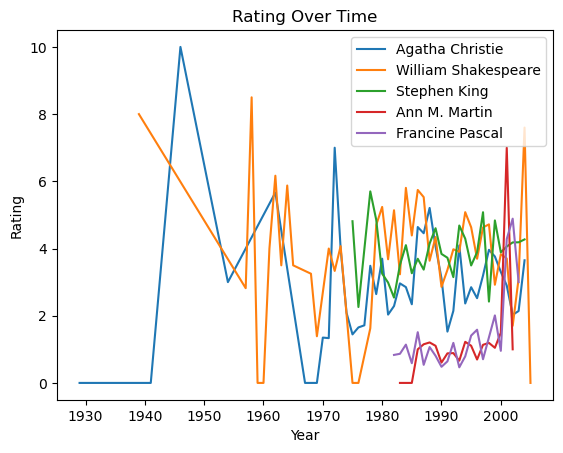

In [169]:
for author in top_5_authors.index:
    sub_df = book_df[book_df['Book-Author']== author]
    sub_time_df = sub_df.groupby('Year-Of-Publication').mean()
    plt.plot(sub_time_df['Book-Rating'], label = author)
plt.title('Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend()
plt.show()

In [170]:
def plot_feature_combinations(df):
    """
    Plots scatter plots for all combinations of integer, float, and datetime columns.

    Args:
    df (pd.DataFrame): The DataFrame containing the features to plot.

    Description:
    This function identifies all integer, float, and datetime columns in the DataFrame
    and plots scatter plots for each pair of features. The plots are arranged in a grid layout.
    """

    numeric_cols = df.select_dtypes(include=[int, float])
    datetime_cols = df.select_dtypes(include=['datetime'])

    cols = pd.concat([numeric_cols, datetime_cols], axis=1)
    n = len(cols.columns)
    fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(15, 15))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i in range(n):
        for j in range(n):
            ax = axes[i, j]
            if i != j:
                ax.scatter(cols.iloc[:, j], cols.iloc[:, i], alpha=0.5)
            else:
                ax.hist(cols.iloc[:, i], bins=15, alpha=0.7)

            if i == n - 1:
                ax.set_xlabel(cols.columns[j])
            if j == 0:
                ax.set_ylabel(cols.columns[i])
                
            if np.issubdtype(cols.iloc[:, j].dtype, np.datetime64):
                ax.xaxis.set_major_locator(mdates.YearLocator())
                ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.show()

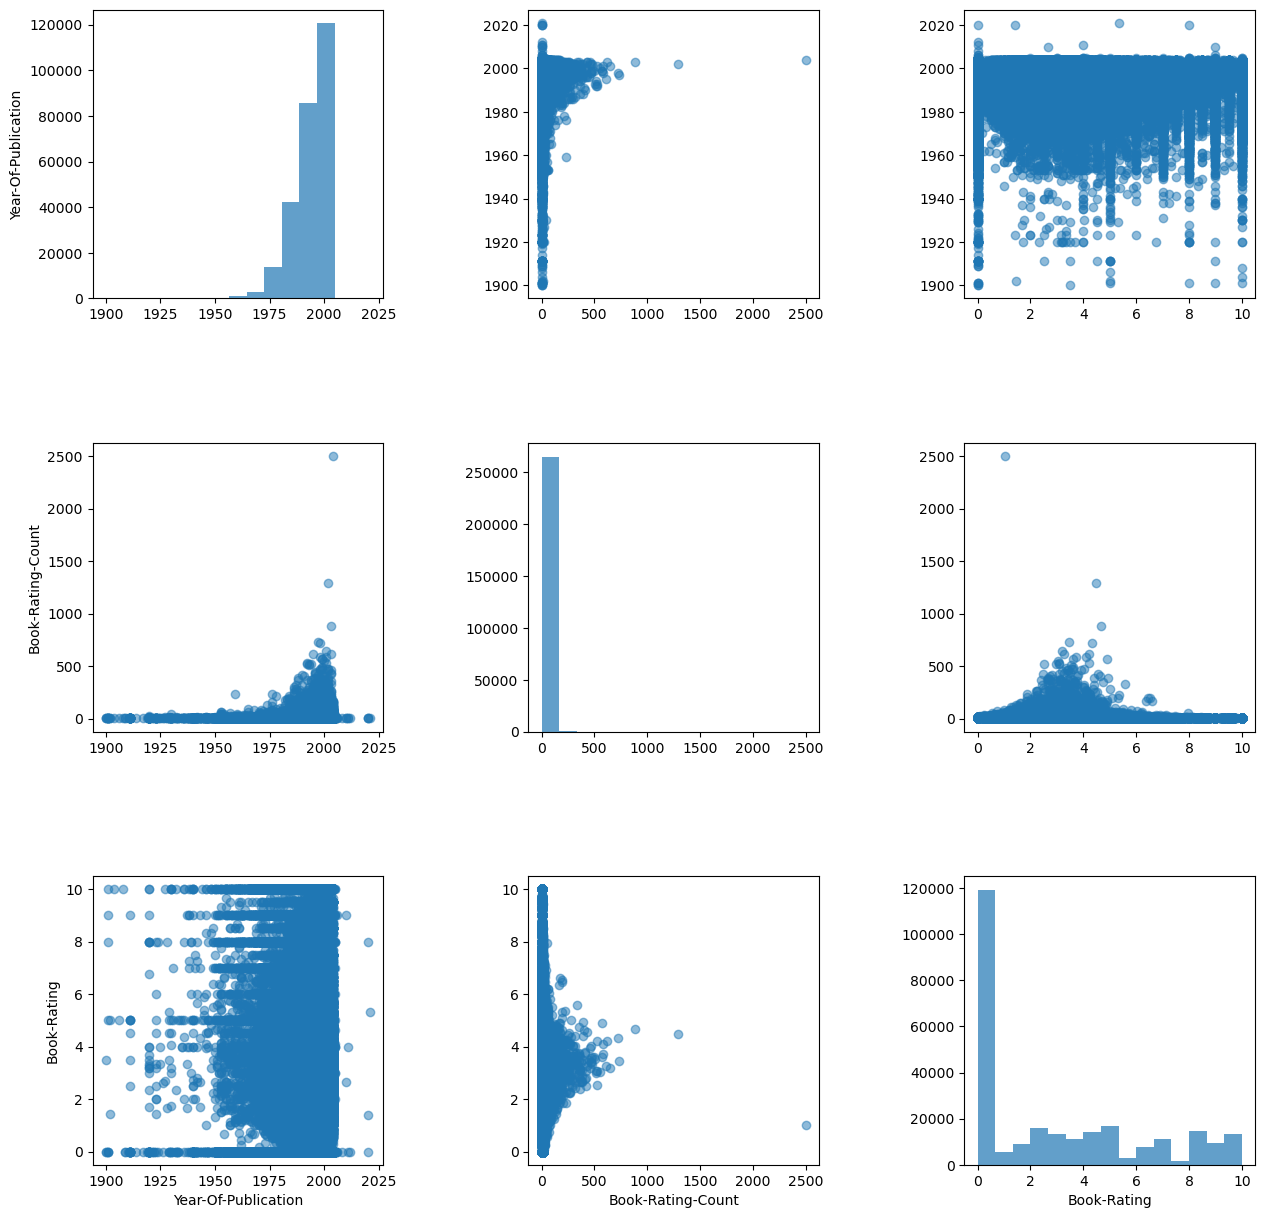

In [171]:
plot_feature_combinations(book_df)

After looking at all this there is the case that we remove the books with less that for example 20 reviews, this however drops the dataset size down from around 260,000 values to just 40,000. So if we want the user to be able to select from a broad range of books we will need to keep the dataset large. With this in mind I will build two models one with more than 20 reviews and one with a min of one review. The risk of course is that with only one review we do not know how accruate the rating is that the model is getting. But now that we have the user info, we can build a model that takes in the type of user in order to make a potentially more accurate suggestion, we can also do some more accurate metrics.

In [15]:
users_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


Annoyingly will need to drop the Nan values for the cosine function as it cannot handle them. Will also need to split out the location into a useable format.

In [7]:
users_df.dropna()

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0
...,...,...,...
278848,278849,"georgetown, ontario, canada",23.0
278850,278851,"dallas, texas, usa",33.0
278851,278852,"brisbane, queensland, australia",32.0
278852,278853,"stranraer, n/a, united kingdom",17.0


In [6]:
book_ratings_df['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [8]:
book_ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
